<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/Titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pson2900","key":"b435673b6aef6478204607fb1d5bdff6"}'}

In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Jan  2 06:07 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# List available datasets.
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
spscientist/students-performance-in-exams                     Students Performance in Exams                         8KB  2018-11-09 18:25:25           9444  
mehdidag/black-friday                                         Black Friday                                          5MB  2018-07-25 20:49:48          23945  
lava18/google-play-store-apps                                 Google Play Store Apps                                2MB  2018-09-18 20:49:49          29000  
szamil/who-suicide-statistics                                 WHO Suicide Statistics                              307KB  2018-08-29 21:23:11           6408  
iarunava/happy-house-dataset                        

In [7]:
# Copy the stackoverflow data set locally.
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 27.2MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 28.4MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.36MB/s]


In [8]:
!sudo pip install -U seaborn

    100% |████████████████████████████████| 215kB 30.9MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [11]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender =  pd.read_csv('gender_submission.csv')

X = training
y = training.Survived

feature_train = X.drop(['Name','PassengerId'],axis = 1)
gioitinh= {'male':0,'female':1}
feature_train.Sex.replace(gioitinh,inplace = True)

embarked = {'S':1,'C':2,'Q':3}
feature_train.Embarked.replace(embarked,inplace = True)
feature_train.Embarked.fillna(0,inplace = True)

feature_train['Family'] = feature_train.SibSp  + feature_train.Parch
feature_train.Family.loc[feature_train.Family > 0] =1 
feature_train.Family.loc[feature_train.Family == 0] = 0 

feature_train.Age.fillna(0,inplace = True)

feature_train.Cabin.fillna("X",inplace = True)
feature_train.Cabin = [i[0] for i in feature_train.Cabin]
s = feature_train.Cabin.sort_values().unique()
label = pd.factorize(s)

feature_train.Cabin = feature_train.Cabin.replace(label[1],label[0])
X = feature_train.drop(['Ticket','SibSp','Parch'],axis= 1)

X_train,X_val,y_train,y_val = train_test_split(X,y)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
training[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived',ascending= True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [50]:
training[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived',ascending= True)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [49]:
training[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived',ascending= True)

,SibSp,Survived
5,5,0.000000
6,8,0.000000
4,4,0.166667
3,3,0.250000
0,0,0.345395
2,2,0.464286
1,1,0.535885


In [48]:
training[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived',ascending= True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


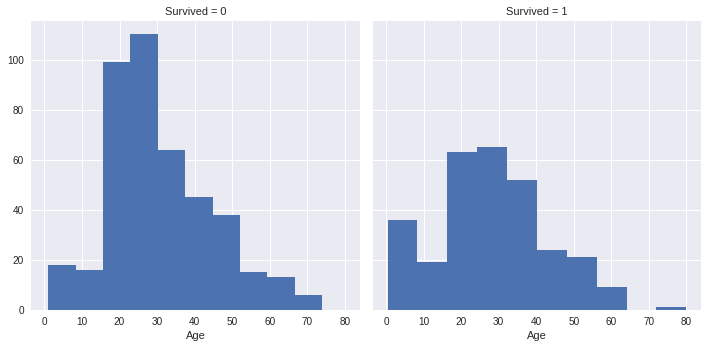

In [59]:
sns.FacetGrid(data= training, col = 'Survived',size = 5).map(plt.hist,'Age',bins = 10,)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  confint = []


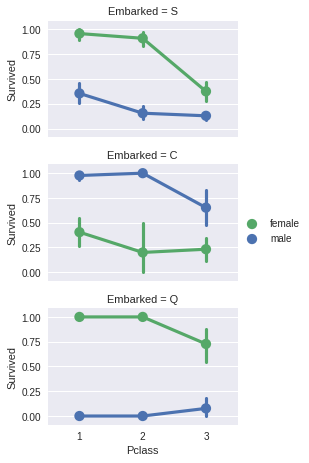

In [60]:
grid = sns.FacetGrid(training, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


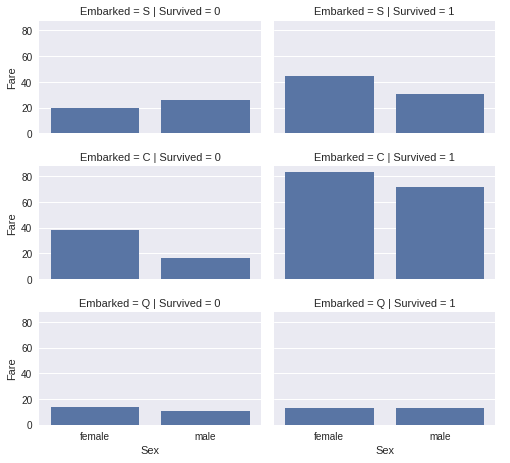

In [65]:
grid = sns.FacetGrid(training, row='Embarked',col = 'Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare',ci = None)
grid.add_legend()

In [35]:
training.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Pasic, Mr. Jakob",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


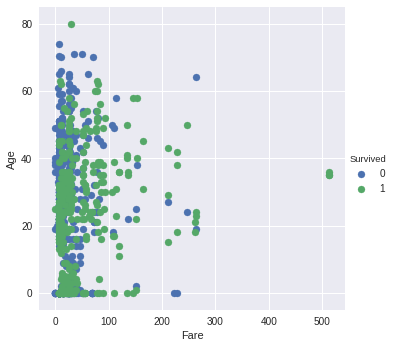

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(X, hue = 'Survived', size = 5).map(plt.scatter,'Fare','Age').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  cat_pos = np.ones(swarm_data.size) * center


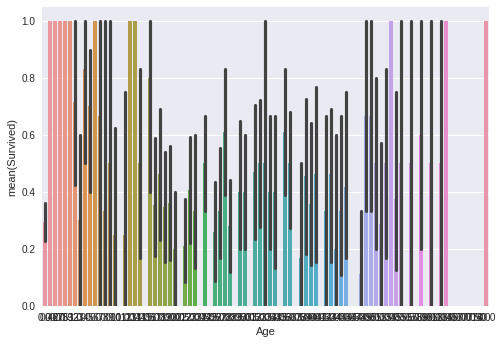

In [26]:
sns.barplot("Age","Survived", data = X)

In [0]:
test.head()
X_test = test
feature_test = X_test.drop(['Name','PassengerId'],axis = 1)

gioitinh= {'male':0,'female':1}
feature_test.Sex.replace(gioitinh,inplace = True)

embarked = {'S':0,'C':1,'Q':2}
feature_test.Embarked.replace(embarked,inplace= True)


feature_test['Family'] = feature_test.SibSp  + feature_train.Parch
feature_test.Family.loc[feature_test.Family > 0] =1 
feature_test.Family.loc[feature_test.Family == 0] = 0 

feature_test.Age.fillna(0,inplace = True)

feature_test.Cabin.fillna('X',inplace = True)
feature_test.Cabin = [i[0] for i in feature_test.Cabin]
h = feature_test.Cabin.sort_values().unique()
label = pd.factorize(h)
feature_test.Cabin = feature_test.Cabin.replace(label[1],label[0])

feature_test.Fare.fillna(0,inplace = True)
feature_test = feature_test.drop(['SibSp','Parch','Ticket'],axis = 1 )
X_test = feature_test
y_test = gender.Survived

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import cross_validate
print(X_train.shape)
print(y_train.shape)

model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
loss = mean_squared_error(y_test,pred)
print('Mean Squared Error: ', loss)
score = r2_score(y_test,pred)
print('Variabel accuracy: %.2f',score)
# vals = cross_validate(model,X_val,y_val,)
# print('val_score', vals)

(668, 7)
(668,)
Mean Squared Error:  0.06892984070391245
Variabel accuracy: %.2f 0.7021246169580926


In [0]:
a = y_train.reshape(-1,1)
a.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(668, 1)